# Shinkansen Travel Experience

**Context**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

**Goal:**

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of travelling on the Shinkansen Bullet Train.

**Dataset:**

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

Train_Data
Test_Data

Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine-learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

**Data Dictionary:**

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

ID
Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

**Evaluation Criteria:**

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.

In other words, the best possible accuracy is 100% (or 1), and the worst possible accuracy 0%.

## Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('rainbow')

# To predict missing values
from sklearn.impute import KNNImputer

# To Standardize Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# To build model for prediction
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    recall_score,
    precision_score,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

## Data Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Survey Data
survey_train=pd.read_csv('/content/drive/MyDrive/MIT IDSS/Hackathon/Surveydata_train.csv')

# Travel Data
travel_train=pd.read_csv('/content/drive/MyDrive/MIT IDSS/Hackathon/Traveldata_train.csv')

In [ ]:
survey_train.head() # Displaying Survey Train Data

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
travel_train.head() # Displaying Travel Train Data

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
# Merging Survey and Travel Train Data on ID
train=pd.merge(survey_train, travel_train, on='ID')
train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


### Shape of Data

In [ ]:
train.shape

(94379, 25)

* The training data has 94379 rows and 25 columns.

### Data types of columns

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

* Most columns are categorical except ID, Overall_Experience, Age, Travel_Distance, Departure_Delay_in_Mins and Arrival_Delay_in_Mins.

In [ ]:
# Checking duplicate values
train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

* We can drop the ID column as there unique values for each customer and it will not be necessary for the model.

### Checking Null Values

In [ ]:
train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

* We can see that few columns are missing around 100 values but 5 columns are missing ~9000 values.

#### Filling Missing Data

##### Categorical Data

In [ ]:
categorical_cols_missing=['Seat_Comfort','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding','Gender','Customer_Type','Type_Travel']

# Calculate mode for each categorical column and fill missing values
for col in categorical_cols_missing:
    mode_value = train[col].mode()[0]  # Calculate mode
    train[col].fillna(mode_value, inplace=True)  # Fill missing values with mode

##### Continuous Data

In [ ]:
imputer = KNNImputer(n_neighbors=5)
continuous_cols_missing=['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']
train[continuous_cols_missing] = imputer.fit_transform(train[continuous_cols_missing])

In [ ]:
train.isnull().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

* All missing values have been filled.

## Exploratory Data Analysis (EDA)

* EDA is an important part of any project involving data.
* It is important to investigate and understand the data better before building a model with it.

### Statistical Summary of the data

In [ ]:
train.describe().applymap('{:.2f}'.format).T

,count,mean,std,min,25%,50%,75%,max
ID,94379.00,98847190.00,27245.01,98800001.00,98823595.50,98847190.00,98870784.50,98894379.00
Overall_Experience,94379.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Age,94379.00,39.42,15.11,7.00,27.00,40.00,51.00,85.00
Travel_Distance,94379.00,1978.89,1027.96,50.00,1359.00,1923.00,2538.00,6951.00
Departure_Delay_in_Mins,94379.00,14.65,38.13,0.00,0.00,0.00,12.00,1592.00
Arrival_Delay_in_Mins,94379.00,15.08,38.58,0.00,0.00,0.00,13.00,1584.00


* Most customers of age 39 use the train, and leads as old as 85 and as young as 7.
* 55% of the customers are satisfied.
* The trains travel to distances ranging from 6591 to 50 kms with an average of around ~2000 kms.
* These trains have an average departure delay of 14 minutes and an average arrival delay of 15 minutes.

In [ ]:
# Making a list of all categorical variables
cat_col = list(train.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(train[column].value_counts())
    print("-" * 70)

Acceptable           21219
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
----------------------------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
----------------------------------------------------------------------
Good                 28504
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: Arrival_Time_Convenient, dtype: int64
----------------------------------------------------------------------
Acceptable           27209
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: Catering, dtype: int64
----------------------------------------------------------------------
Manageable           24203
Convenient           21912
N

* Most customers are satisfied with the seat comfort but many say that it needs improvement.
* The customers use the Green Car and Ordinary Class almost equally.
* Most of the customers say that the catering is acceptable, but some complain about food quality.
* Many customers express satisfaction with the arrival time, although a few raise that it can be improved.
* Most people are happy with the platform location , the Wi-Fi service, the entertainment and online support.
* They also find the online booking services good,few people say that legroom requires improvement.
* Customers are satisfied with the baggage handling and check-in service.
* Most people are happy with the cleanliness of the trains and platforms.
* Most of the customers who board are female, and most travel for business reasons.
* Almost 52% of the customers the travel Economic class and rest travel Business class.

#### Dropping ID columns

In [ ]:
train.drop(columns='ID',inplace=True)
train.head()

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0
1,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,0,Acceptable,Ordinary,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


### Univariate Analysis

#### Distribution of Continuous variables

In [ ]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

##### Histogram and Boxplot of Age

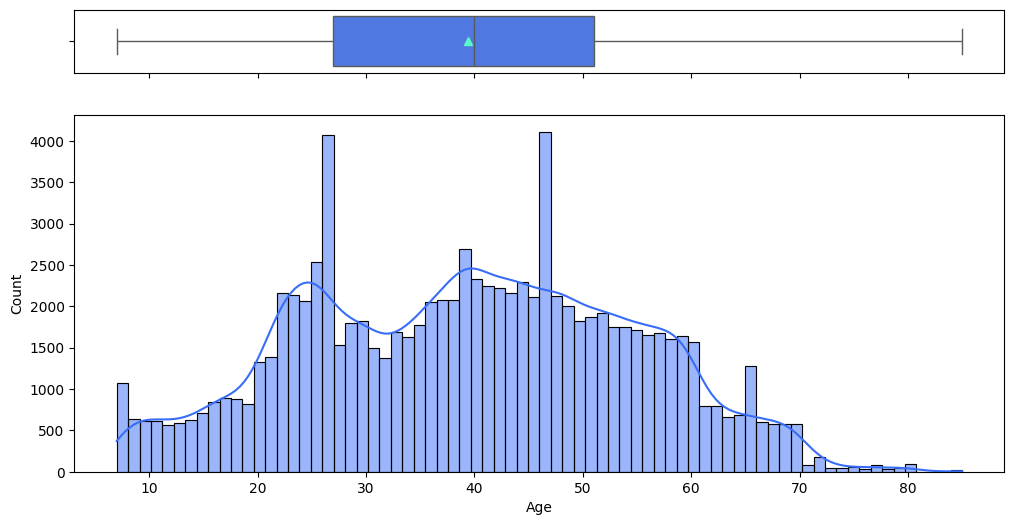

In [ ]:
hist_box(train, 'Age')

* Age almost has normal distribution.
* The boxplot shows there are no outliers present in this variable.

##### Histogram and Boxplot of Travel Distance

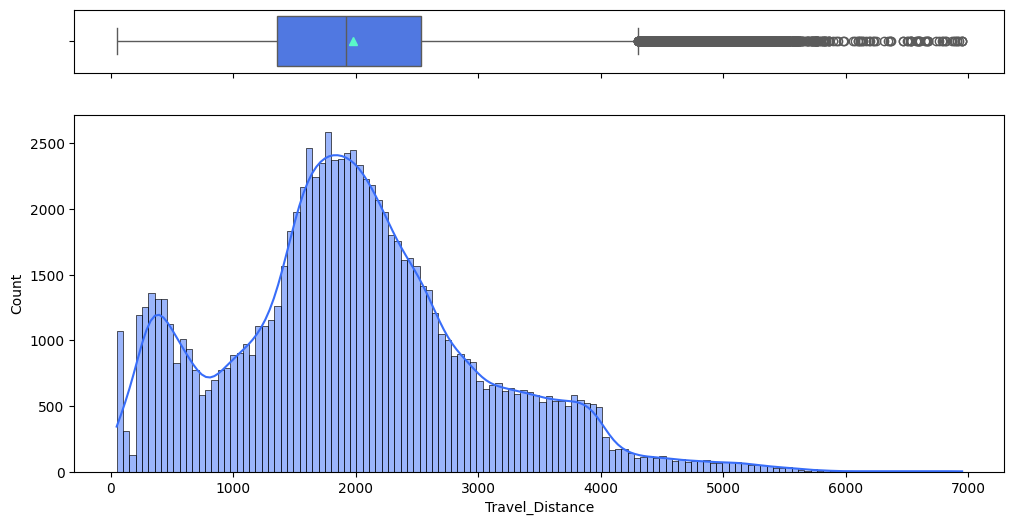

In [ ]:
hist_box(train, 'Travel_Distance')

* This distribution looks like right-skewed.
* Most customers use the train that travels around 1500-2500 kms.
* This variable has many outliers and need to be dealt with.

In [ ]:
train[train['Travel_Distance']>4000]

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
51,0,Poor,Ordinary,Extremely Poor,Extremely Poor,Manageable,Poor,Extremely Poor,Poor,Poor,...,Good,Poor,Female,Loyal Customer,26.0,Business Travel,Business,4560,0.0,7.0
79,0,Needs Improvement,Green Car,Acceptable,Poor,Manageable,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,...,Needs Improvement,Needs Improvement,Male,Loyal Customer,25.0,Business Travel,Business,5406,0.0,0.0
83,1,Poor,Ordinary,Poor,Poor,Inconvenient,Good,Good,Good,Excellent,...,Excellent,Good,Female,Loyal Customer,44.0,Business Travel,Business,4013,0.0,0.0
112,1,Good,Ordinary,Good,Good,Convenient,Good,Good,Good,Good,...,Excellent,Good,Male,Loyal Customer,26.0,Business Travel,Business,4615,17.0,6.0
115,0,Acceptable,Green Car,Poor,Poor,Inconvenient,Acceptable,Acceptable,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,22.0,Business Travel,Business,4733,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94195,1,Needs Improvement,Ordinary,Good,Needs Improvement,Needs Improvement,Excellent,Good,Excellent,Excellent,...,Excellent,Acceptable,Female,Loyal Customer,43.0,Business Travel,Business,4046,0.0,0.0
94215,0,Needs Improvement,Green Car,Good,Good,Convenient,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,...,Needs Improvement,Needs Improvement,Male,Loyal Customer,24.0,Business Travel,Business,4199,29.0,10.0
94295,0,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,...,Good,Needs Improvement,Male,Loyal Customer,30.0,Business Travel,Business,4927,26.0,25.0
94353,1,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Excellent,Excellent,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,28.0,Business Travel,Business,4645,0.0,2.0


##### Histogram and Boxplot of Departure Delay

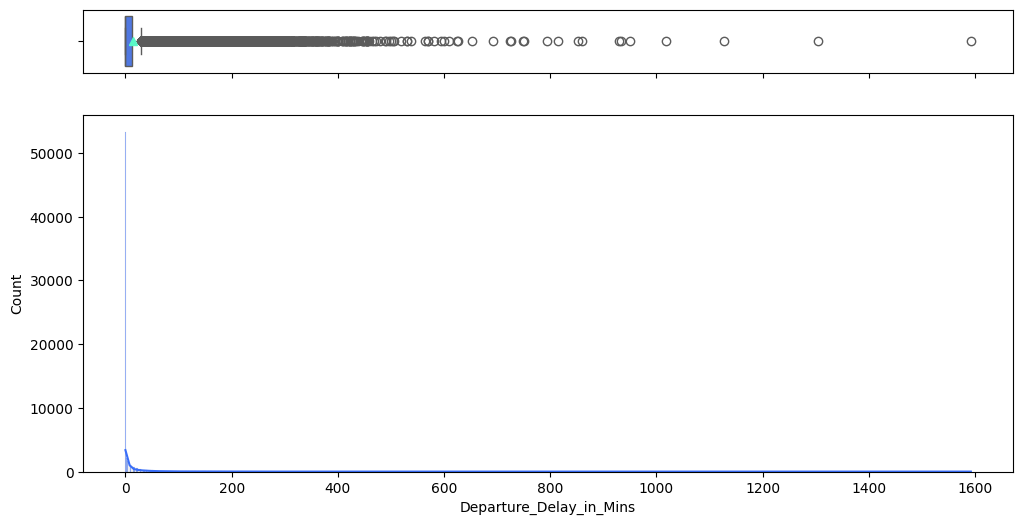

In [ ]:
hist_box(train, 'Departure_Delay_in_Mins')

* The distribution looks like right-skewed.
* The boxplot shows many outliers and needs to dealt with.

In [ ]:
train[train['Departure_Delay_in_Mins']>30]

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
14,0,Acceptable,Ordinary,Poor,Poor,Inconvenient,Acceptable,Acceptable,Acceptable,Acceptable,...,Needs Improvement,Acceptable,Male,Loyal Customer,33.0,Business Travel,Business,1180,49.0,49.0
30,0,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Good,Acceptable,Excellent,Good,...,Good,Good,Male,Loyal Customer,9.0,Business Travel,Eco,2379,100.0,93.0
33,1,Excellent,Ordinary,Good,Excellent,Needs Improvement,Poor,Excellent,Poor,Poor,...,Good,Poor,Male,Disloyal Customer,22.0,Business Travel,Business,2515,42.0,30.0
35,0,Needs Improvement,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,...,Needs Improvement,Needs Improvement,Female,Loyal Customer,54.0,Business Travel,Business,2032,65.0,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94328,0,Needs Improvement,Green Car,Excellent,Needs Improvement,Convenient,Needs Improvement,Acceptable,Acceptable,Excellent,...,Acceptable,Acceptable,Female,Loyal Customer,52.0,Business Travel,Eco,2160,211.0,213.0
94349,0,Needs Improvement,Ordinary,Good,Needs Improvement,Convenient,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,...,Acceptable,Needs Improvement,Male,Disloyal Customer,45.0,Business Travel,Eco,1665,31.0,25.0
94354,1,Needs Improvement,Green Car,Good,Needs Improvement,Needs Improvement,Needs Improvement,Good,Good,Excellent,...,Excellent,Good,Male,Loyal Customer,48.0,Business Travel,Business,2179,65.0,54.0
94367,0,Acceptable,Ordinary,Good,Acceptable,Inconvenient,Acceptable,Needs Improvement,Needs Improvement,Needs Improvement,...,Needs Improvement,Needs Improvement,Male,Loyal Customer,14.0,Personal Travel,Business,2842,142.0,141.0


##### Histogram and Boxplot of Arrival Delay

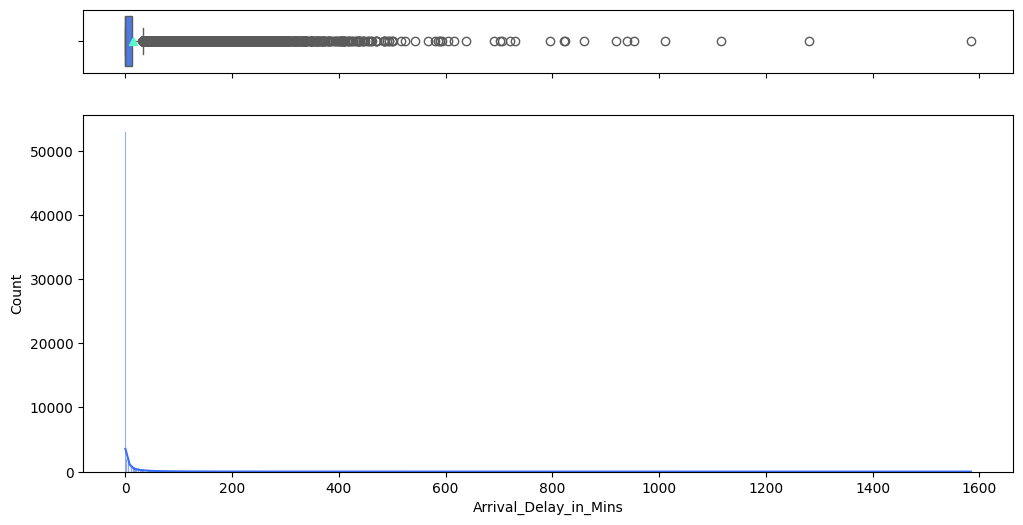

In [ ]:
hist_box(train, 'Arrival_Delay_in_Mins')

* The distribution looks like right-skewed.
* The boxplot shows many outliers and needs to dealt with.

In [ ]:
train[train['Arrival_Delay_in_Mins']>30]

,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
2,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
13,0,Good,Ordinary,Good,Good,Manageable,Good,Excellent,Good,Good,...,Acceptable,Good,Female,Loyal Customer,47.0,Personal Travel,Eco,1100,20.0,34.0
14,0,Acceptable,Ordinary,Poor,Poor,Inconvenient,Acceptable,Acceptable,Acceptable,Acceptable,...,Needs Improvement,Acceptable,Male,Loyal Customer,33.0,Business Travel,Business,1180,49.0,49.0
17,1,Excellent,Green Car,Excellent,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Poor,...,Excellent,Excellent,Male,Loyal Customer,68.0,Personal Travel,Eco,3756,20.0,52.0
19,1,Excellent,Green Car,Good,Good,Manageable,Good,Good,Good,Good,...,Excellent,Good,Male,Disloyal Customer,24.0,Business Travel,Eco,1994,22.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94324,1,Excellent,Green Car,Excellent,Acceptable,Very Convenient,Acceptable,Acceptable,Acceptable,Needs Improvement,...,Poor,Acceptable,Male,Loyal Customer,35.0,Business Travel,Business,2592,610.0,593.0
94328,0,Needs Improvement,Green Car,Excellent,Needs Improvement,Convenient,Needs Improvement,Acceptable,Acceptable,Excellent,...,Acceptable,Acceptable,Female,Loyal Customer,52.0,Business Travel,Eco,2160,211.0,213.0
94354,1,Needs Improvement,Green Car,Good,Needs Improvement,Needs Improvement,Needs Improvement,Good,Good,Excellent,...,Excellent,Good,Male,Loyal Customer,48.0,Business Travel,Business,2179,65.0,54.0
94367,0,Acceptable,Ordinary,Good,Acceptable,Inconvenient,Acceptable,Needs Improvement,Needs Improvement,Needs Improvement,...,Needs Improvement,Needs Improvement,Male,Loyal Customer,14.0,Personal Travel,Business,2842,142.0,141.0


#### Distribution of Categorical Variables

#### Seat Comfort

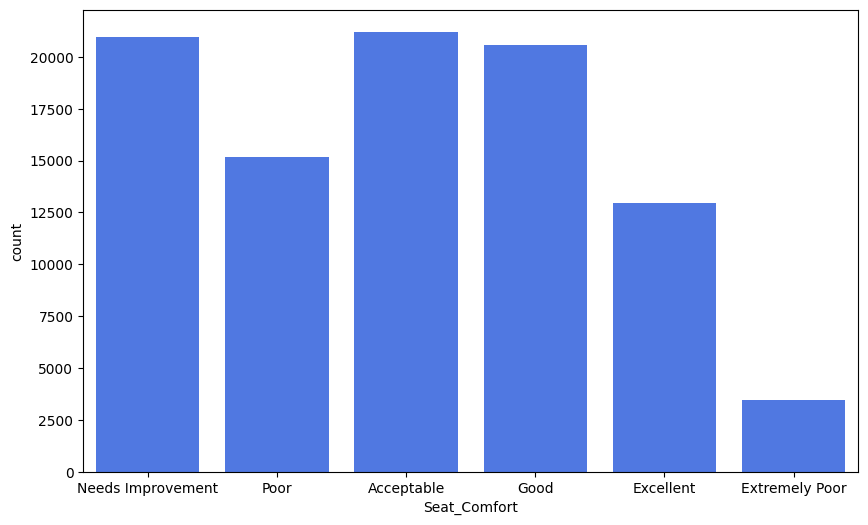

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Seat_Comfort'])
plt.show()

In [ ]:
train['Seat_Comfort'].value_counts(normalize=True)

Acceptable           0.224828
Needs Improvement    0.221935
Good                 0.218216
Poor                 0.160894
Excellent            0.137435
Extremely Poor       0.036692
Name: Seat_Comfort, dtype: float64

* Most customers find the seat comfort acceptable, but also many say they require improvement.

##### Arrival Time Convenient

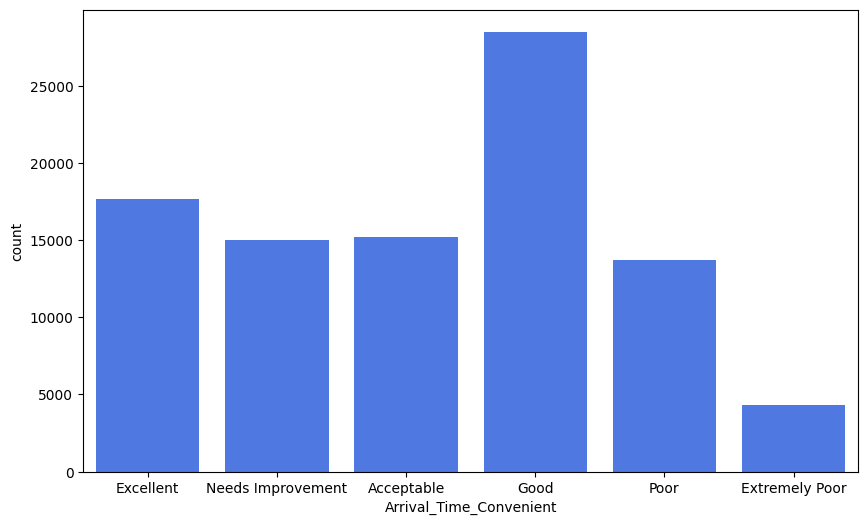

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Arrival_Time_Convenient'])
plt.show()

In [ ]:
train['Arrival_Time_Convenient'].value_counts(normalize=True)

Good                 0.302016
Excellent            0.187372
Acceptable           0.160809
Needs Improvement    0.158828
Poor                 0.145075
Extremely Poor       0.045900
Name: Arrival_Time_Convenient, dtype: float64

* Most customers find the train arrival good, but also many say they require improvement.

##### Legroom

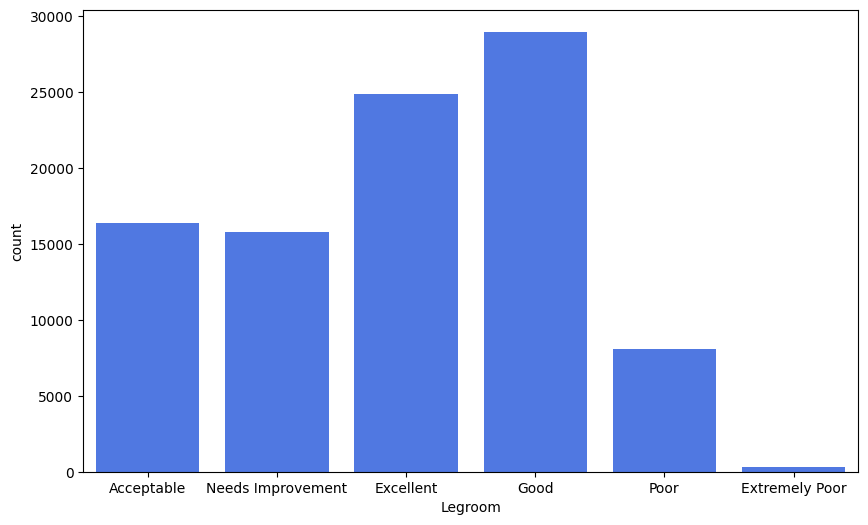

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Legroom'])
plt.show()

In [ ]:
train['Legroom'].value_counts(normalize=True)

Good                 0.306848
Excellent            0.263109
Acceptable           0.173598
Needs Improvement    0.166912
Poor                 0.085930
Extremely Poor       0.003602
Name: Legroom, dtype: float64

* 30% people find th legroom to be good, followed by excellent and acceptable.

##### Online Boarding

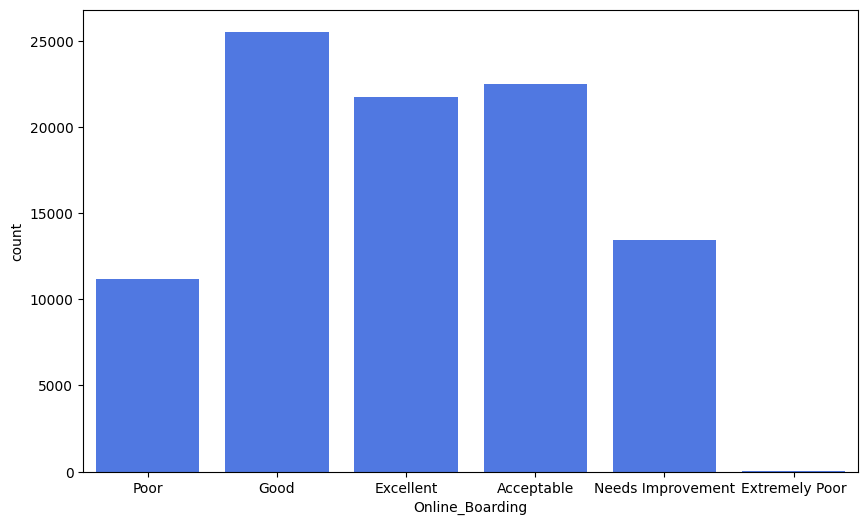

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Online_Boarding'])
plt.show()

In [ ]:
train['Online_Boarding'].value_counts(normalize=True)

Good                 0.270600
Acceptable           0.238136
Excellent            0.230369
Needs Improvement    0.142521
Poor                 0.118247
Extremely Poor       0.000127
Name: Online_Boarding, dtype: float64

* 73% customers find online boarding to helpful.

##### Onboard Wifi Service

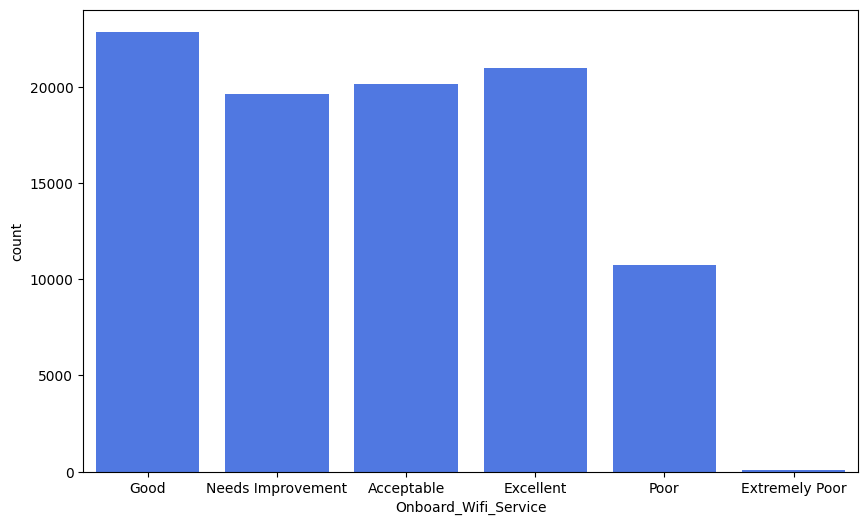

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Onboard_Wifi_Service'])
plt.show()

In [ ]:
train['Onboard_Wifi_Service'].value_counts(normalize=True)

Good                 0.242268
Excellent            0.222168
Acceptable           0.213162
Needs Improvement    0.207631
Poor                 0.113807
Extremely Poor       0.000964
Name: Onboard_Wifi_Service, dtype: float64

* 67% of the customers find the WiFi service nice but 20% say it requires improvement.

### Bivariate Analysis

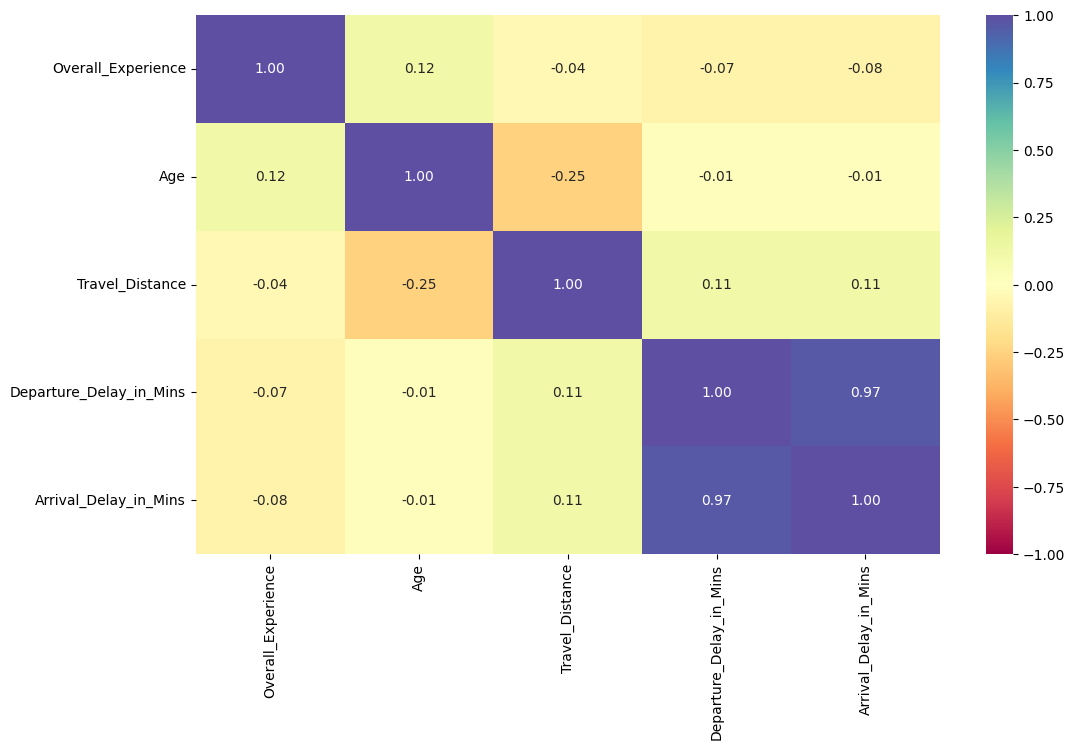

In [ ]:
cols_list = train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(train[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Age is slightly positive correlated with overall experience but is negatively correlated with travel distance older people travel less.
* Travel distance is negatively correlated with overall experience as more the distance more tired and bored people become, but positively correlated with departure and arrival times.
* Departure delay is highly positive correlated with arrival delay.

### Data Pre-Processing

#### Removing Outliers

In [ ]:
# Dropping observations with distance greater than 4300 km
train.drop(index=train[train.Travel_Distance>4200].index,inplace=True)

# Dropping observations with departure delay and arrival delay greater than 1000 min
train.drop(index=train[train.Departure_Delay_in_Mins>20].index,inplace=True)
train.drop(index=train[train.Arrival_Delay_in_Mins>20].index,inplace=True)

#### Separating Independent variables(X) and Dependent variable(y)

In [ ]:
X=train.drop(columns='Overall_Experience')
y=train['Overall_Experience']

#### Splitting Train and Test sets

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

#### Convert int64 type to float type columns

In [ ]:
for column in ['Age', 'Travel_Distance']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

##### Replacing Categorical variables

In [ ]:
# Initializing categorical columns
encoded_cols=['Seat_Comfort','Seat_Class','Arrival_Time_Convenient','Catering','Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support','Ease_of_Online_Booking','Onboard_Service','Legroom','Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding','Gender','Customer_Type','Type_Travel','Travel_Class']

# Initializing Label Encoder
le=LabelEncoder()

X_train[encoded_cols] = X_train[encoded_cols].apply(lambda x: le.fit_transform(x))
X_test[encoded_cols] = X_test[encoded_cols].apply(lambda x: le.fit_transform(x))

##### Scaling Continuous Variables

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the continuous variables
X_train[['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Travel_Distance']] = scaler.fit_transform(X_train[['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Travel_Distance']])
X_test[['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Travel_Distance']] = scaler.fit_transform(X_test[['Age','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Travel_Distance']])

## Building Classification Model

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### XGBoost

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic',  # Binary classification
    reg_alpha=0.1,  # L1 regularization parameter
    reg_lambda=0.1,  # L2 regularization parameter
    random_state=42,
    colsample_bytree= 0.7, gamma= 1, learning_rate= 0.1, max_depth= 25, min_child_weight= 1, n_estimators= 500)  # Seed for reproducibility)
xgb_model.fit(X_train, y_train) # {'colsample_bytree': 0.7, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 25, 'min_child_weight': 1, 'n_estimators': 500, 'random_state': 42}

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
pred_test_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, pred_test_xgb)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9481229430468009


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7810
           1       0.95      0.96      0.95     10117

    accuracy                           0.95     17927
   macro avg       0.95      0.94      0.94     17927
weighted avg       0.95      0.95      0.95     17927



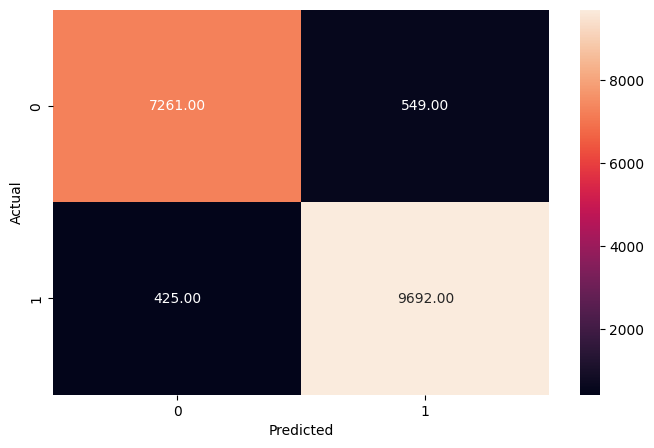

In [ ]:
metrics_score(y_test, pred_test_xgb)

#### Hyperparameter Tuning

In [ ]:
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100, 500],
    'max_depth': [25, 30, 35],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma':[0.1, 0.2],
    'min_child_weight':[1, 5],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 30, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1}


In [ ]:
best_xgb_model = grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy after GridSearchCV: {xgb_accuracy}")

XGBoost Accuracy after GridSearchCV: 0.9471746527584091
